In [9]:
import torch
import sys
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
sys.path.append('../data_retrieval/')
from data import base_dataset
import json

In [10]:
data = base_dataset.Signs_Dataset("../data_retrieval/data/annotations.csv","../data_retrieval/data")

In [11]:
f = open("../data_retrieval/data/mapping")
mapping = json.load(f)

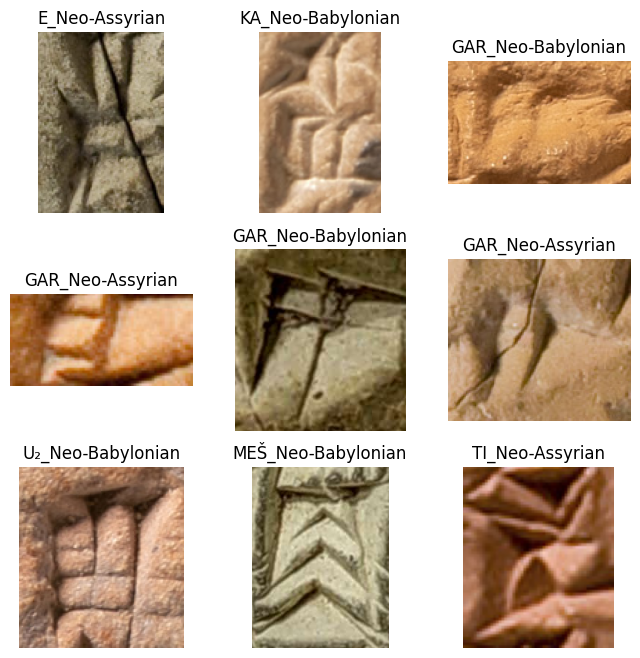

In [21]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(mapping[str(label)])
    plt.axis("off")
    plt.imshow(img.permute(2,1,0), cmap="gray")
plt.show()